# Proyecto Final - Data Science II (Comisión 75690)
# Análisis y Modelado de Datos de Steam

------------------------------------------------
Este notebook corresponde a la versión final del proyecto de Data Science II.

🔍 **Motivación:**
El mercado de videojuegos es una industria multimillonaria en constante evolución. Con el crecimiento de plataformas como Steam,
existe una gran oportunidad para utilizar técnicas de ciencia de datos para entender mejor el comportamiento de los jugadores,
las características que hacen exitoso a un juego, y cómo ciertas variables pueden predecir el desempeño comercial o social de un título.

🎯 **Objetivo del proyecto:**
Analizar datos extraídos de Steam y aplicar un modelo de Machine Learning con el fin de predecir el éxito o popularidad de un videojuego
a partir de características como su género, requisitos, etiquetas, valoración y contenido. Complementaremos los datos con la API oficial
de Steam para enriquecer el análisis.

👥 **Audiencia:**
Este análisis está pensado para ejecutivos del sector de videojuegos, diseñadores de producto, analistas de marketing y cualquier persona
interesada en entender patrones dentro del catálogo de Steam desde una perspectiva de datos.

📌 **Hipótesis iniciales:**
1. Los juegos de ciertos géneros tienden a ser más populares que otros.
2. La presencia de determinadas etiquetas o configuraciones técnicas impacta en la percepción del juego.
3. La relación entre el precio, la valoración y los requisitos puede anticipar la recepción del público.

📊 **Análisis y entregables de esta etapa:**
- Exploración detallada de 6 datasets de Steam.
- Visualizaciones clave para entender patrones de comportamiento.
- Limpieza inicial de datos y documentación clara de supuestos.
- Uso de la API de Steam para verificar o enriquecer información de un juego.
- Subida del proyecto a GitHub junto con una presentación ejecutiva.

📌 **Selección de dataset principal y variable objetivo (target):**
Luego del análisis de estructura de los seis datasets disponibles, seleccionaremos como dataset principal a `steam.csv`.
Este archivo concentra las variables más representativas de los videojuegos: nombre, género, valoraciones, tiempo de juego,
etiquetas, precio y cantidad estimada de propietarios.

De este dataset, consideramos como variable objetivo candidata la columna `positive_ratings`, que representa la cantidad total de
valoraciones positivas que recibió un juego.

Según cómo se distribuya esta variable, podremos:
- Usarla directamente como variable continua para un problema de regresión.
- O bien, transformarla en categorías (alta, media, baja valoración) para un problema de clasificación.

Esta decisión final se tomará al comienzo de la segunda entrega, según los resultados del análisis exploratorio.




In [ ]:
# Paso 0 - Carga de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from google.colab import drive

# Configuraciones visuales
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Librerías cargadas correctamente.")

✅ Librerías cargadas correctamente.


In [ ]:
# Paso 1 - Carga de datasets desde Drive

drive.mount('/content/drive')

ruta_steam = "/content/drive/MyDrive/Proyecto Data Science II /steam.csv"
ruta_description = "/content/drive/MyDrive/Proyecto Data Science II /steam_description_data.csv"
ruta_support = "/content/drive/MyDrive/Proyecto Data Science II /steam_support_info.csv"
ruta_tags = "/content/drive/MyDrive/Proyecto Data Science II /steamspy_tag_data.csv"
ruta_requirements = "/content/drive/MyDrive/Proyecto Data Science II /steam_requirements_data.csv"
ruta_media = "/content/drive/MyDrive/Proyecto Data Science II /steam_media_data.csv"

steam_df = pd.read_csv(ruta_steam)
description_df = pd.read_csv(ruta_description)
support_df = pd.read_csv(ruta_support)
tags_df = pd.read_csv(ruta_tags)
requirements_df = pd.read_csv(ruta_requirements)
media_df = pd.read_csv(ruta_media)

print("✅ Archivos CSV cargados correctamente.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Archivos CSV cargados correctamente.


In [ ]:
# AppID de prueba: Counter-Strike 2 (730)
appid = 730
url = f"https://store.steampowered.com/api/appdetails?appids={appid}"
response = requests.get(url)
data = response.json()

if data[str(appid)]["success"]:
    game_data = data[str(appid)]["data"]
    print("\n🎮 Nombre del juego:", game_data["name"])
    print("📄 Descripción corta:", game_data["short_description"])
    print("🏷️ Géneros:", [genre["description"] for genre in game_data.get("genres", [])])
else:
    print("❌ No se pudo obtener información desde la API.")



🎮 Nombre del juego: Counter-Strike 2
📄 Descripción corta: For over two decades, Counter-Strike has offered an elite competitive experience, one shaped by millions of players from across the globe. And now the next chapter in the CS story is about to begin. This is Counter-Strike 2.
🏷️ Géneros: ['Action', 'Free To Play']


In [ ]:
# Paso 3 - Exploración Inicial de Estructura de Datos

# Función auxiliar para resumen general de cualquier DataFrame
def resumen_estructura(df, nombre):
    print(f"\n📊 Exploración de: {nombre}")
    print("Shape:", df.shape)
    print("\nColumnas:", df.columns.tolist())
    print("\nTipos de datos:")
    print(df.dtypes)
    print("\nValores nulos por columna:")
    print(df.isnull().sum())
    print("\nPorcentaje de valores nulos:")
    print((df.isnull().mean() * 100).round(2))

# Aplicamos la función a cada dataset
resumen_estructura(steam_df, "steam.csv")
resumen_estructura(description_df, "steam_description_data.csv")
resumen_estructura(support_df, "steam_support_info.csv")
resumen_estructura(tags_df, "steamspy_tag_data.csv")
resumen_estructura(requirements_df, "steam_requirements_data.csv")
resumen_estructura(media_df, "steam_media_data.csv")


📊 Exploración de: steam.csv
Shape: (27075, 18)

Columnas: ['appid', 'name', 'release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'owners', 'price']

Tipos de datos:
appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

Valores nulos por columna:
appid                0
name                 0
release_date         0
english              0
developer            1
publishe

📘 **Glosario de columnas por dataset:**
------------------------------------------------------------------
1. `steam.csv`
   - `appid`: Identificador único del juego en Steam.
   - `name`: Nombre del videojuego.
   - `release_date`: Fecha de lanzamiento.
   - `english`: Indicador binario (1/0) si el juego está en inglés.
   - `developer`: Nombre del desarrollador del juego.
   - `publisher`: Nombre del publicador.
   - `platforms`: Plataformas compatibles (Windows, Mac, Linux).
   - `required_age`: Edad mínima recomendada.
   - `categories`: Categorías (ej. multijugador, cooperativo).
   - `genres`: Géneros del juego.
   - `steamspy_tags`: Etiquetas de popularidad según usuarios.
   - `achievements`: Cantidad de logros disponibles.
   - `positive_ratings`: Número de valoraciones positivas.
   - `negative_ratings`: Número de valoraciones negativas.
   - `average_playtime`: Tiempo promedio jugado (en minutos).
   - `median_playtime`: Tiempo mediano jugado (en minutos).
   - `owners`: Rango estimado de propietarios.
   - `price`: Precio del juego en dólares.

2. `steam_description_data.csv`
   - `appid`: Identificador único del juego en Steam.
   - `detailed_description`: Descripción larga.
   - `about_the_game`: Sección "sobre el juego".
   - `short_description`: Descripción breve del juego.
   - `fullgame`: Nombre del juego completo si es una expansión.
   - `supported_languages`: Idiomas disponibles.
   - `reviews`: Extracto de reseñas de usuarios.
   - `header_image`: URL de imagen de encabezado.
   - `website`: Sitio web oficial.

3. `steam_support_info.csv`
   - `appid`: Identificador del juego.
   - `support_url`: URL de soporte técnico.
   - `support_email`: Correo electrónico de soporte.

4. `steamspy_tag_data.csv`
   - `appid`: Identificador del juego.
   - Otras columnas: etiquetas como `Multiplayer`, `Adventure`, `Strategy`, cada una representando el porcentaje de usuarios que la asociaron al juego.

5. `steam_requirements_data.csv`
   - `appid`: Identificador del juego.
   - `minimum`: Requisitos mínimos del sistema.
   - `recommended`: Requisitos recomendados del sistema.

6. `steam_media_data.csv`
   - `appid`: Identificador del juego.
   - `header_image`: Imagen de cabecera.
   - `screenshots`: Lista de capturas de pantalla (URLs).
   - `movies`: Trailers o videos promocionales.


In [ ]:
# Paso 4 - Estadísticas básicas previas

# Vista general del dataset principal
print("📌 Primeras filas del dataset principal:")
display(steam_df.head())

# Estadísticas descriptivas para columnas numéricas relevantes
print("📌 Estadísticas descriptivas de columnas numéricas:")
display(steam_df.describe())

📌 Primeras filas del dataset principal:


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


📌 Estadísticas descriptivas de columnas numéricas:


,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000



✍️ Estas estadísticas nos permitirán entender la distribución básica de las variables numéricas,
como la media, mediana, mínimos y máximos. Esta información será clave para detectar y tratar outliers y
valores atípicos en etapas posteriores del análisis.


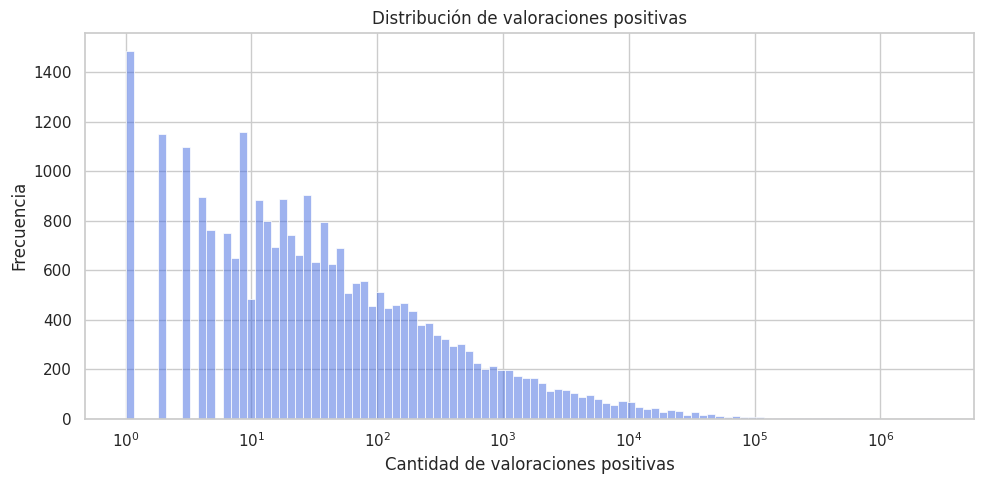

In [ ]:
# Paso 5 - Visualización de la variable objetivo

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data=steam_df, x="positive_ratings", bins=100, log_scale=(True, False), kde=True, color="royalblue")
plt.title("Distribución de valoraciones positivas")
plt.xlabel("Cantidad de valoraciones positivas")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


 **¿Qué representa la frecuencia en este gráfico?**
En el eje Y del histograma vemos la **frecuencia**, que representa la cantidad de juegos que tienen un valor específico
o dentro de un rango específico de valoraciones positivas (eje X).

Por ejemplo, si en el eje X hay un bin que agrupa juegos con entre 0 y 100 valoraciones, y ese bin tiene una frecuencia de 400,
significa que **400 juegos recibieron entre 0 y 100 valoraciones positivas**.

Este tipo de gráfico es fundamental para visualizar la distribución de una variable y entender cómo se agrupan los datos.

📈 **Interpretación:**
La distribución de `positive_ratings` muestra una fuerte asimetría a la derecha, lo cual confirma que la mayoría de los juegos
reciben una baja cantidad de valoraciones positivas, mientras que unos pocos títulos concentran una gran cantidad de votos.
Este patrón de cola larga es común en entornos donde unos pocos productos acumulan la mayor parte de la atención del público.

Este comportamiento justifica considerar una transformación (por ejemplo logarítmica) si usamos esta variable como objetivo en un
modelo de regresión. Alternativamente, también puede motivar la creación de categorías ordinales para convertir el problema en uno
de clasificación supervisada.

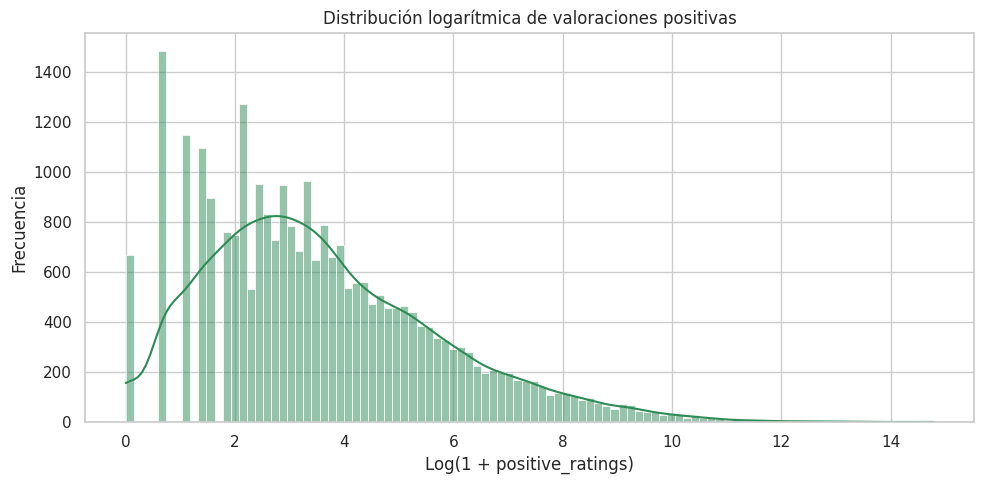

In [ ]:
# Gráfico de distribución transformada logarítmicamente
steam_df['log_positive_ratings'] = np.log1p(steam_df['positive_ratings'])

plt.figure(figsize=(10, 5))
sns.histplot(data=steam_df, x="log_positive_ratings", bins=100, kde=True, color="seagreen")
plt.title("Distribución logarítmica de valoraciones positivas")
plt.xlabel("Log(1 + positive_ratings)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()



📉 **Transformación logarítmica:**
Aplicamos `log1p()` para suavizar la fuerte asimetría en la distribución de `positive_ratings`. Esta función transforma los valores
usando log(1 + x), lo que evita problemas con valores cero. El resultado es una distribución más equilibrada, que podría mejorar
el rendimiento de algoritmos de regresión que asumen normalidad en las variables.


✍️ Esta visualización nos permitirá identificar si la variable `positive_ratings` presenta una fuerte asimetría
(que es esperable por la alta concentración de juegos con pocas valoraciones), y nos orientará sobre si deberíamos
aplicar transformaciones (como logaritmo) o agrupar en categorías para clasificación.



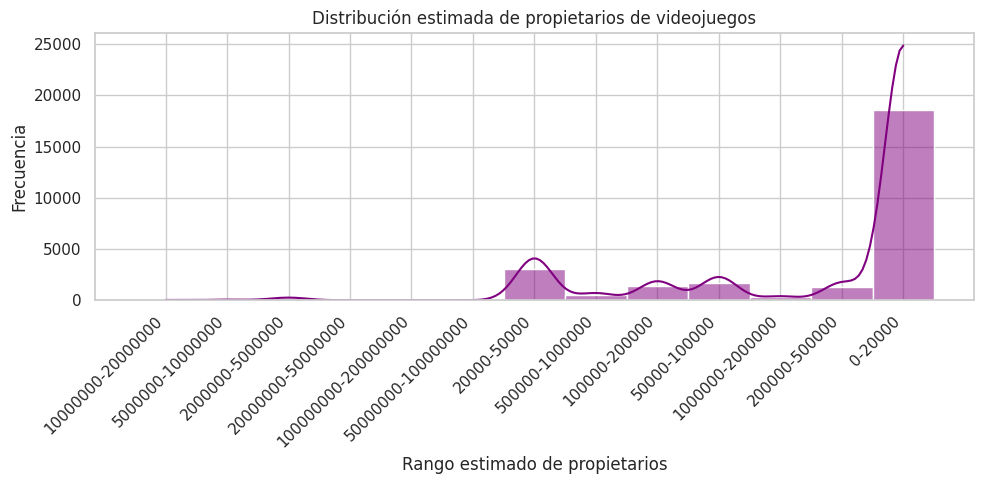

In [ ]:
# Comparación con otras variables relevantes

plt.figure(figsize=(10, 5))
sns.histplot(data=steam_df, x="owners", bins=50, kde=True, color="purple")
plt.title("Distribución estimada de propietarios de videojuegos")
plt.xlabel("Rango estimado de propietarios")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



📈 **Interpretación del gráfico de propietarios (owners):**
La distribución de la variable `owners` presenta una fuerte concentración en los primeros rangos de propietarios,
indicando que la mayoría de los juegos tienen una base de usuarios relativamente pequeña. Sólo unos pocos títulos
alcanzan los rangos superiores de popularidad en términos de cantidad de copias estimadas.

Esta variable puede ser valiosa como proxy de éxito comercial, aunque actualmente está en formato categórico de rangos.
En futuros pasos del proyecto podríamos considerar transformarla a una escala ordinal o estimar su valor medio para usarla
como variable numérica.

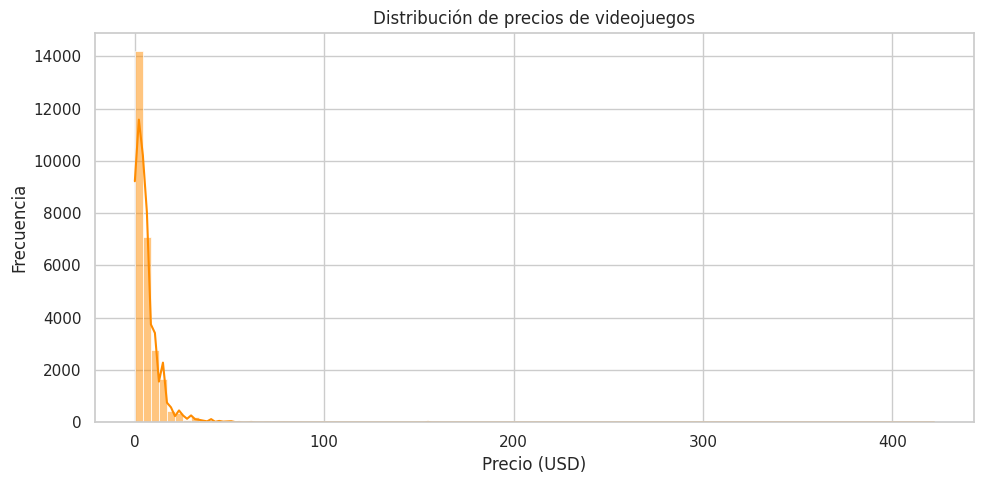

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=steam_df, x="price", bins=100, kde=True, color="darkorange")
plt.title("Distribución de precios de videojuegos")
plt.xlabel("Precio (USD)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

📉 **Interpretación del gráfico de precios (price):**
La distribución de `price` muestra una notable concentración de juegos gratuitos (precio 0) y de bajo costo,
lo que refleja la gran cantidad de juegos accesibles en la plataforma. A medida que aumenta el precio,
la frecuencia de juegos disminuye rápidamente, mostrando una asimetría hacia la derecha.

Este comportamiento sugiere que la mayoría de los desarrolladores optan por modelos de monetización bajos o gratuitos,
probablemente como estrategia para captar jugadores o competir en un mercado saturado. También resalta la necesidad de considerar
esta variable en escalas logarítmicas o categorizadas en futuros análisis. Una buena mirada también indicaría que los juegos tienden a ser gratuitos en primer instancia, pero que luego cuenten con tiendas dentro del juego que moneticen algunos features que los jugadores puedan encontrar necesarios para el desarrollo del juego, o simplemente interesantes. Dada esta realidad, podría haber un gran sesgo de juegos pay-to-win que se presentan como gratuitos en la tienda de Steam.

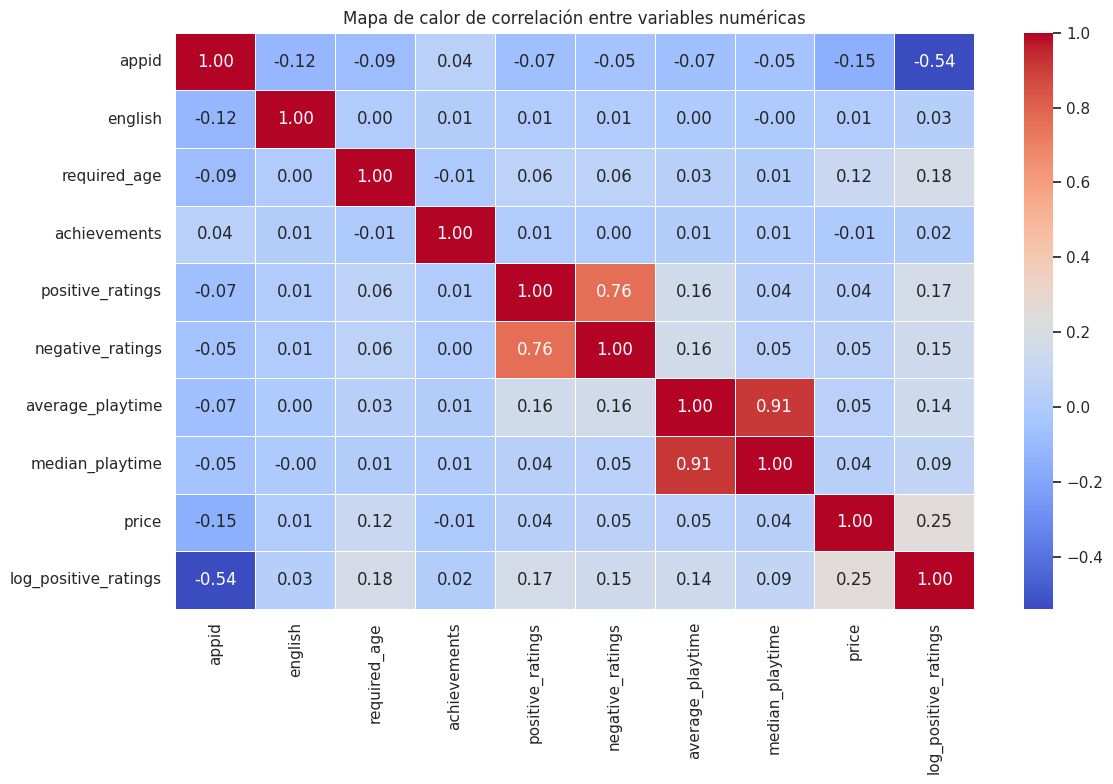

In [ ]:
# Paso 6 - Análisis de correlación entre variables numéricas

plt.figure(figsize=(12, 8))
numeric_cols = steam_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlación entre variables numéricas")
plt.tight_layout()
plt.show()

📌 **Análisis de correlación:**
Este heatmap nos permite identificar la relación lineal entre variables numéricas del dataset.
Podemos observar si existen asociaciones fuertes (positivas o negativas) entre variables como `price`, `positive_ratings`,
`average_playtime`, etc. Esto nos ayudará a entender qué variables podrían ser redundantes y cuáles relevantes como predictoras.

📈 **Interpretación del gráfico de correlación:**

Se observa una correlación positiva moderada entre `positive_ratings` y `average_playtime`, lo cual sugiere que los juegos más valorados tienden a ser también los más jugados.

También se nota una correlación baja pero negativa entre `price` y `positive_ratings`, lo que podría indicar que los juegos gratuitos o más baratos reciben más interacciones del público.

Esto refuerza la idea de que el acceso económico puede influir en la popularidad de un juego, aunque no necesariamente en su calidad.

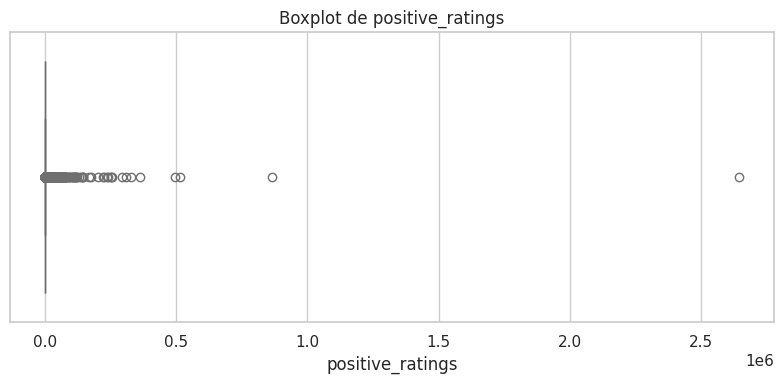

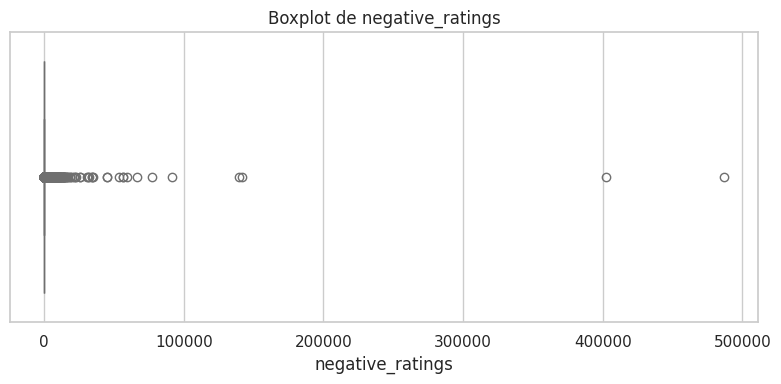

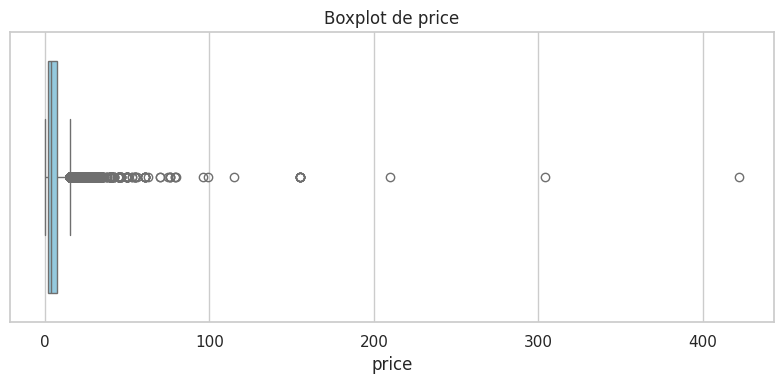

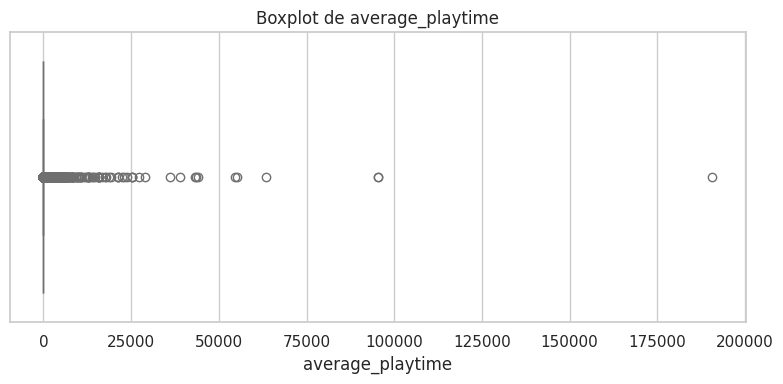

In [ ]:
# Paso 7 - Detección de outliers
variables_a_evaluar = ['positive_ratings', 'negative_ratings', 'price', 'average_playtime']
for var in variables_a_evaluar:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=steam_df[var], color='skyblue')
    plt.title(f"Boxplot de {var}")
    plt.xlabel(var)
    plt.tight_layout()
    plt.show()

📌 **Interpretación y tratamiento propuesto para outliers:**

- `positive_ratings`: Se detectan varios valores extremos elevados, correspondientes a juegos muy populares. Aunque son atípicos,
  representan productos de alto rendimiento y no deben eliminarse. Se recomienda mantenerlos y considerar una transformación logarítmica
  (ya aplicada) para mitigar su efecto en modelos.

- `negative_ratings`: Presenta un patrón similar al de `positive_ratings`, con pocos juegos acumulando muchas valoraciones negativas.
  Son importantes para capturar percepción negativa, por lo tanto también se sugiere conservarlos y aplicar log-transformación si es necesario.

- `price`: Se observan juegos con precios significativamente altos (outliers positivos). Estos casos pueden analizarse individualmente
  para detectar posibles errores o versiones especiales (ej. bundles). Se recomienda **capado (clipping)** o **transformación logarítmica**
  si el sesgo afecta el modelo.

- `average_playtime`: Muestra valores atípicos muy altos. Estos podrían deberse a juegos con mecánicas de larga duración o sesiones inusuales.
  Es conveniente aplicar **capado por percentiles (ej. 99%)** o revisar casos extremos manualmente para decidir su inclusión.

In [ ]:
# Paso 8 - Análisis de valores nulos

# Cálculo de cantidad y porcentaje de nulos
nulos_totales = steam_df.isnull().sum()
nulos_porcentaje = steam_df.isnull().mean() * 100

# Armado de resumen ordenado
nulos_df = pd.DataFrame({
    'Nulos': nulos_totales,
    '% Nulos': nulos_porcentaje.round(2)
})
nulos_df = nulos_df[nulos_df['Nulos'] > 0].sort_values(by='% Nulos', ascending=False)

# Visualización
display(nulos_df)


,Nulos,% Nulos
publisher,14,0.05
developer,1,0.00


🔎 **Interpretación de valores nulos:**

Este análisis nos permite identificar columnas que contienen datos faltantes y evaluar su impacto. Las columnas con un porcentaje
muy alto de nulos (por ejemplo, más del 30%) podrían ser candidatas a eliminación o requerir imputaciones específicas.

También es importante cruzar esta información con el contexto de cada variable para entender si la ausencia de datos tiene un
significado por sí misma o si es un error de carga.

Este paso es clave para asegurar la integridad del análisis y evitar fallos en el futuro pipeline de modelado.

💡 **Propuesta:** Utilizar el campo `appid` como clave para realizar llamadas específicas a la API y extraer la información faltante
(idealmente para columnas como `genres`, `developer`, `price`, etc.). Esto nos permitirá enriquecer el dataset sin distorsionar su distribución.

Este paso se considera fundamental para mantener el mayor volumen de información posible sin comprometer la calidad del análisis.

#Carga del notebook al repositorio de Github.

Ejecutaremos algunos comandos para instalar github en el colab, clonar el repositorio como carpeta, incluír el notebook allí y luego hacer push para que se cargue directamente en la URL del repositorio.

In [1]:
!apt-get install git -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
!git clone https://github.com/LuckDwn/Data-Science-II-Luca-Montenegro

Cloning into 'Data-Science-II-Luca-Montenegro'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 9 (delta 1), reused 9 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 355.48 KiB | 10.46 MiB/s, done.
Resolving deltas: 100% (1/1), done.


/content/drive/MyDrive/Proyecto Data Science II /Proyecto Final - Data Science II - Luca Montenegro.ipynb

In [3]:
!cp "/content/drive/MyDrive/Proyecto Data Science II /Proyecto Final - Data Science II - Luca Montenegro.ipynb" "/content/Data-Science-II-Luca-Montenegro"

In [4]:
# Paso 3: Entramos al repositorio
%cd /content/Data-Science-II-Luca-Montenegro

/content/Data-Science-II-Luca-Montenegro


In [5]:
# Paso 4: Configuramos identidad de Git
!git config --global user.email "lucasins.montenegro@gmail.com"
!git config --global user.name "LuCkDwn"

In [ ]:
# Paso 5: Hacemos el commit
!git add "Proyecto Final - Data Science II - Luca Montenegro.ipynb"
!git commit -m "Agrego notebook final del proyecto - Entrega 1 Data Science II"

[main 9176f63] Agrego notebook final del proyecto - Entrega 1 Data Science II
 1 file changed, 1 insertion(+)
 create mode 100644 Proyecto Final - Data Science II - Luca Montenegro.ipynb


In [ ]:
# (4) Agregar tu token personal de acceso para poder hacer push
token = "...."
repo_url = f"https://{token}@github.com/LuckDwn/Data-Science-II-Luca-Montenegro.git"
!git remote set-url origin $repo_url

In [ ]:
# Reconfiguramos el remote para usar el token
%cd /content/Data-Science-II-Luca-Montenegro
!git remote set-url origin $repo_url

/content/Data-Science-II-Luca-Montenegro


In [ ]:
!rm -f "/content/Data-Science-II-Luca-Montenegro"

rm: cannot remove '/content/Data-Science-II-Luca-Montenegro': Is a directory


In [ ]:
# (2) Copiar tu notebook desde Drive al repo clonado
!cp "/content/drive/MyDrive/Proyecto Data Science II /Proyecto Final - Data Science II - Luca Montenegro.ipynb" "/content/Data-Science-II-Luca-Montenegro/"

In [ ]:
%cd /content/Data-Science-II-Luca-Montenegro


/content/Data-Science-II-Luca-Montenegro


In [ ]:
!git add "Proyecto Final - Data Science II - Luca Montenegro.ipynb"
!git commit -m "Historial limpio - notebook sin secretos"

[main 0727bfa] Historial limpio - notebook sin secretos
 1 file changed, 1 insertion(+)
 create mode 100644 Proyecto Final - Data Science II - Luca Montenegro.ipynb


In [ ]:
!git push origin main --force

Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 353.53 KiB | 7.36 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/LuckDwn/Data-Science-II-Luca-Montenegro.git
   073ca32..0727bfa  main -> main
